In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
!pip install seaborn
 
# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [3]:
from fosforml.model_manager.snowflakesession import get_session

my_session = get_session()

table_name = 'DATAANALYSISFINAL24'

sf_df = my_session.sql("select * from {}".format(table_name))

df = sf_df.to_pandas()

In [4]:
df.shape

(16848, 13)

In [5]:
df.isnull().sum()

DATE             0
DRUG_ID          0
CUSTOMER_NAME    0
VOLUME           0
UNIT_PRICE       0
TOTAL            0
Discount%        0
CUSTOMER         0
CITY             0
REGION           0
COUNTRY          0
NAME             0
SEGMENT          0
dtype: int64

In [6]:
df.nunique()

DATE             2106
DRUG_ID            10
CUSTOMER_NAME      80
VOLUME           1356
UNIT_PRICE          8
TOTAL            1461
Discount%           4
CUSTOMER            8
CITY               10
REGION              7
COUNTRY             9
NAME                9
SEGMENT             5
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16848 entries, 0 to 16847
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE           16848 non-null  object 
 1   DRUG_ID        16848 non-null  object 
 2   CUSTOMER_NAME  16848 non-null  object 
 3   VOLUME         16848 non-null  float64
 4   UNIT_PRICE     16848 non-null  int16  
 5   TOTAL          16848 non-null  float64
 6   Discount%      16848 non-null  int8   
 7   CUSTOMER       16848 non-null  object 
 8   CITY           16848 non-null  object 
 9   REGION         16848 non-null  object 
 10  COUNTRY        16848 non-null  object 
 11  NAME           16848 non-null  object 
 12  SEGMENT        16848 non-null  object 
dtypes: float64(2), int16(1), int8(1), object(9)
memory usage: 1.5+ MB


In [8]:
import subprocess
import sys

# Function to install a package
def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16848 entries, 0 to 16847
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE           16848 non-null  object 
 1   DRUG_ID        16848 non-null  object 
 2   CUSTOMER_NAME  16848 non-null  object 
 3   VOLUME         16848 non-null  float64
 4   UNIT_PRICE     16848 non-null  int16  
 5   TOTAL          16848 non-null  float64
 6   Discount%      16848 non-null  int8   
 7   CUSTOMER       16848 non-null  object 
 8   CITY           16848 non-null  object 
 9   REGION         16848 non-null  object 
 10  COUNTRY        16848 non-null  object 
 11  NAME           16848 non-null  object 
 12  SEGMENT        16848 non-null  object 
dtypes: float64(2), int16(1), int8(1), object(9)
memory usage: 1.5+ MB


In [10]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
# Convert the DATE column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16848 entries, 0 to 16847
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DATE           16848 non-null  datetime64[ns]
 1   DRUG_ID        16848 non-null  object        
 2   CUSTOMER_NAME  16848 non-null  object        
 3   VOLUME         16848 non-null  float64       
 4   UNIT_PRICE     16848 non-null  int16         
 5   TOTAL          16848 non-null  float64       
 6   Discount%      16848 non-null  int8          
 7   CUSTOMER       16848 non-null  object        
 8   CITY           16848 non-null  object        
 9   REGION         16848 non-null  object        
 10  COUNTRY        16848 non-null  object        
 11  NAME           16848 non-null  object        
 12  SEGMENT        16848 non-null  object        
dtypes: datetime64[ns](1), float64(2), int16(1), int8(1), object(8)
memory usage: 1.5+ MB


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Ensure the DATE column is in datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Ensure the DateTime index has a frequency
df = df.asfreq('D')

# Check for missing values and handle them if necessary
df['VOLUME'] = df['VOLUME'].fillna(method='ffill')

# Decompose the time series data
decomposition = seasonal_decompose(df['VOLUME'], model='additive')

# Plot the decomposition
fig = decomposition.plot()
plt.show()

# Plot the VOLUME data
plt.figure(figsize=(10, 6))
plt.plot(df['VOLUME'], label='VOLUME')
plt.title('Daily VOLUME Data')
plt.xlabel('Date')
plt.ylabel('VOLUME')
plt.legend()
plt.show()

# Split the data into training and testing sets
train_data = df['VOLUME'][:int(0.8*(len(df)))]
test_data = df['VOLUME'][int(0.8*(len(df))):]

# Apply Exponential Smoothing for forecasting
model = ExponentialSmoothing(train_data, seasonal='add', seasonal_periods=12).fit()
forecast = model.forecast(steps=len(test_data))

# Plot the forecasted data
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(forecast, label='Forecasted Data')
plt.title('Time Series Forecasting of VOLUME')
plt.xlabel('Date')
plt.ylabel('VOLUME')
plt.legend()
plt.show()

# Print the forecasted values
print(forecast)

ValueError: This function does not handle missing values

In [ ]:
print(df.head())

In [ ]:
df.index = pd.to_datetime(df.index)

In [ ]:
df = df.asfreq('D')  # 'D' for daily frequency, adjust as needed

In [ ]:
df['VOLUME'] = df['VOLUME'].fillna(method='ffill')

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['VOLUME'], model='additive')

# Plot the decomposition
fig = decomposition.plot()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

# Ensure the index is a DateTime index
df.index = pd.to_datetime(df.index)

# Set the frequency of the time series
df = df.asfreq('D')

# Check for missing values and handle them if necessary
df['VOLUME'] = df['VOLUME'].fillna(method='ffill').fillna(method='bfill')

# Ensure all values are finite
df = df[np.isfinite(df['VOLUME'])]

# Decompose the time series data
decomposition = seasonal_decompose(df['VOLUME'], model='additive')

# Plot the decomposition
fig = decomposition.plot()
plt.show()

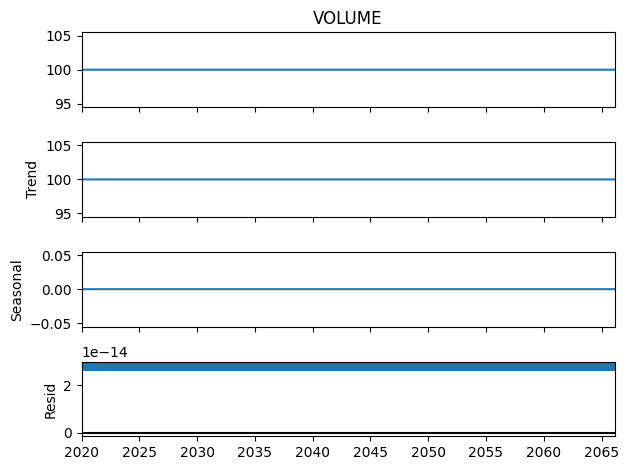

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Sample dataset based on the provided structure
data = {
    'DATE': pd.date_range(start='1/1/2020', periods=16848, freq='D'),
    'DRUG_ID': ['DrugA']*16848,
    'CUSTOMER_NAME': ['Customer1']*16848,
    'VOLUME': [100.0]*16848,
    'UNIT_PRICE': [10]*16848,
    'TOTAL': [1000.0]*16848,
    'Discount%': [5]*16848,
    'CUSTOMER': ['Customer1']*16848,
    'CITY': ['CityA']*16848,
    'REGION': ['RegionA']*16848,
    'COUNTRY': ['CountryA']*16848,
    'NAME': ['NameA']*16848,
    'SEGMENT': ['SegmentA']*16848
}

# Create DataFrame
df = pd.DataFrame(data)

# Ensure the index is a DateTime index
df.set_index('DATE', inplace=True)

# Set the frequency of the time series
df = df.asfreq('D')

# Check for missing values and handle them if necessary
df['VOLUME'] = df['VOLUME'].fillna(method='ffill').fillna(method='bfill')

# Ensure all values are finite
df = df[np.isfinite(df['VOLUME'])]

# Decompose the time series data
decomposition = seasonal_decompose(df['VOLUME'], model='additive')

# Plot the decomposition
fig = decomposition.plot()
plt.show()